## Task 1 



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

%matplotlib inline

In [22]:
data = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df.shape

(891, 12)

In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualizing aspects of the dataset

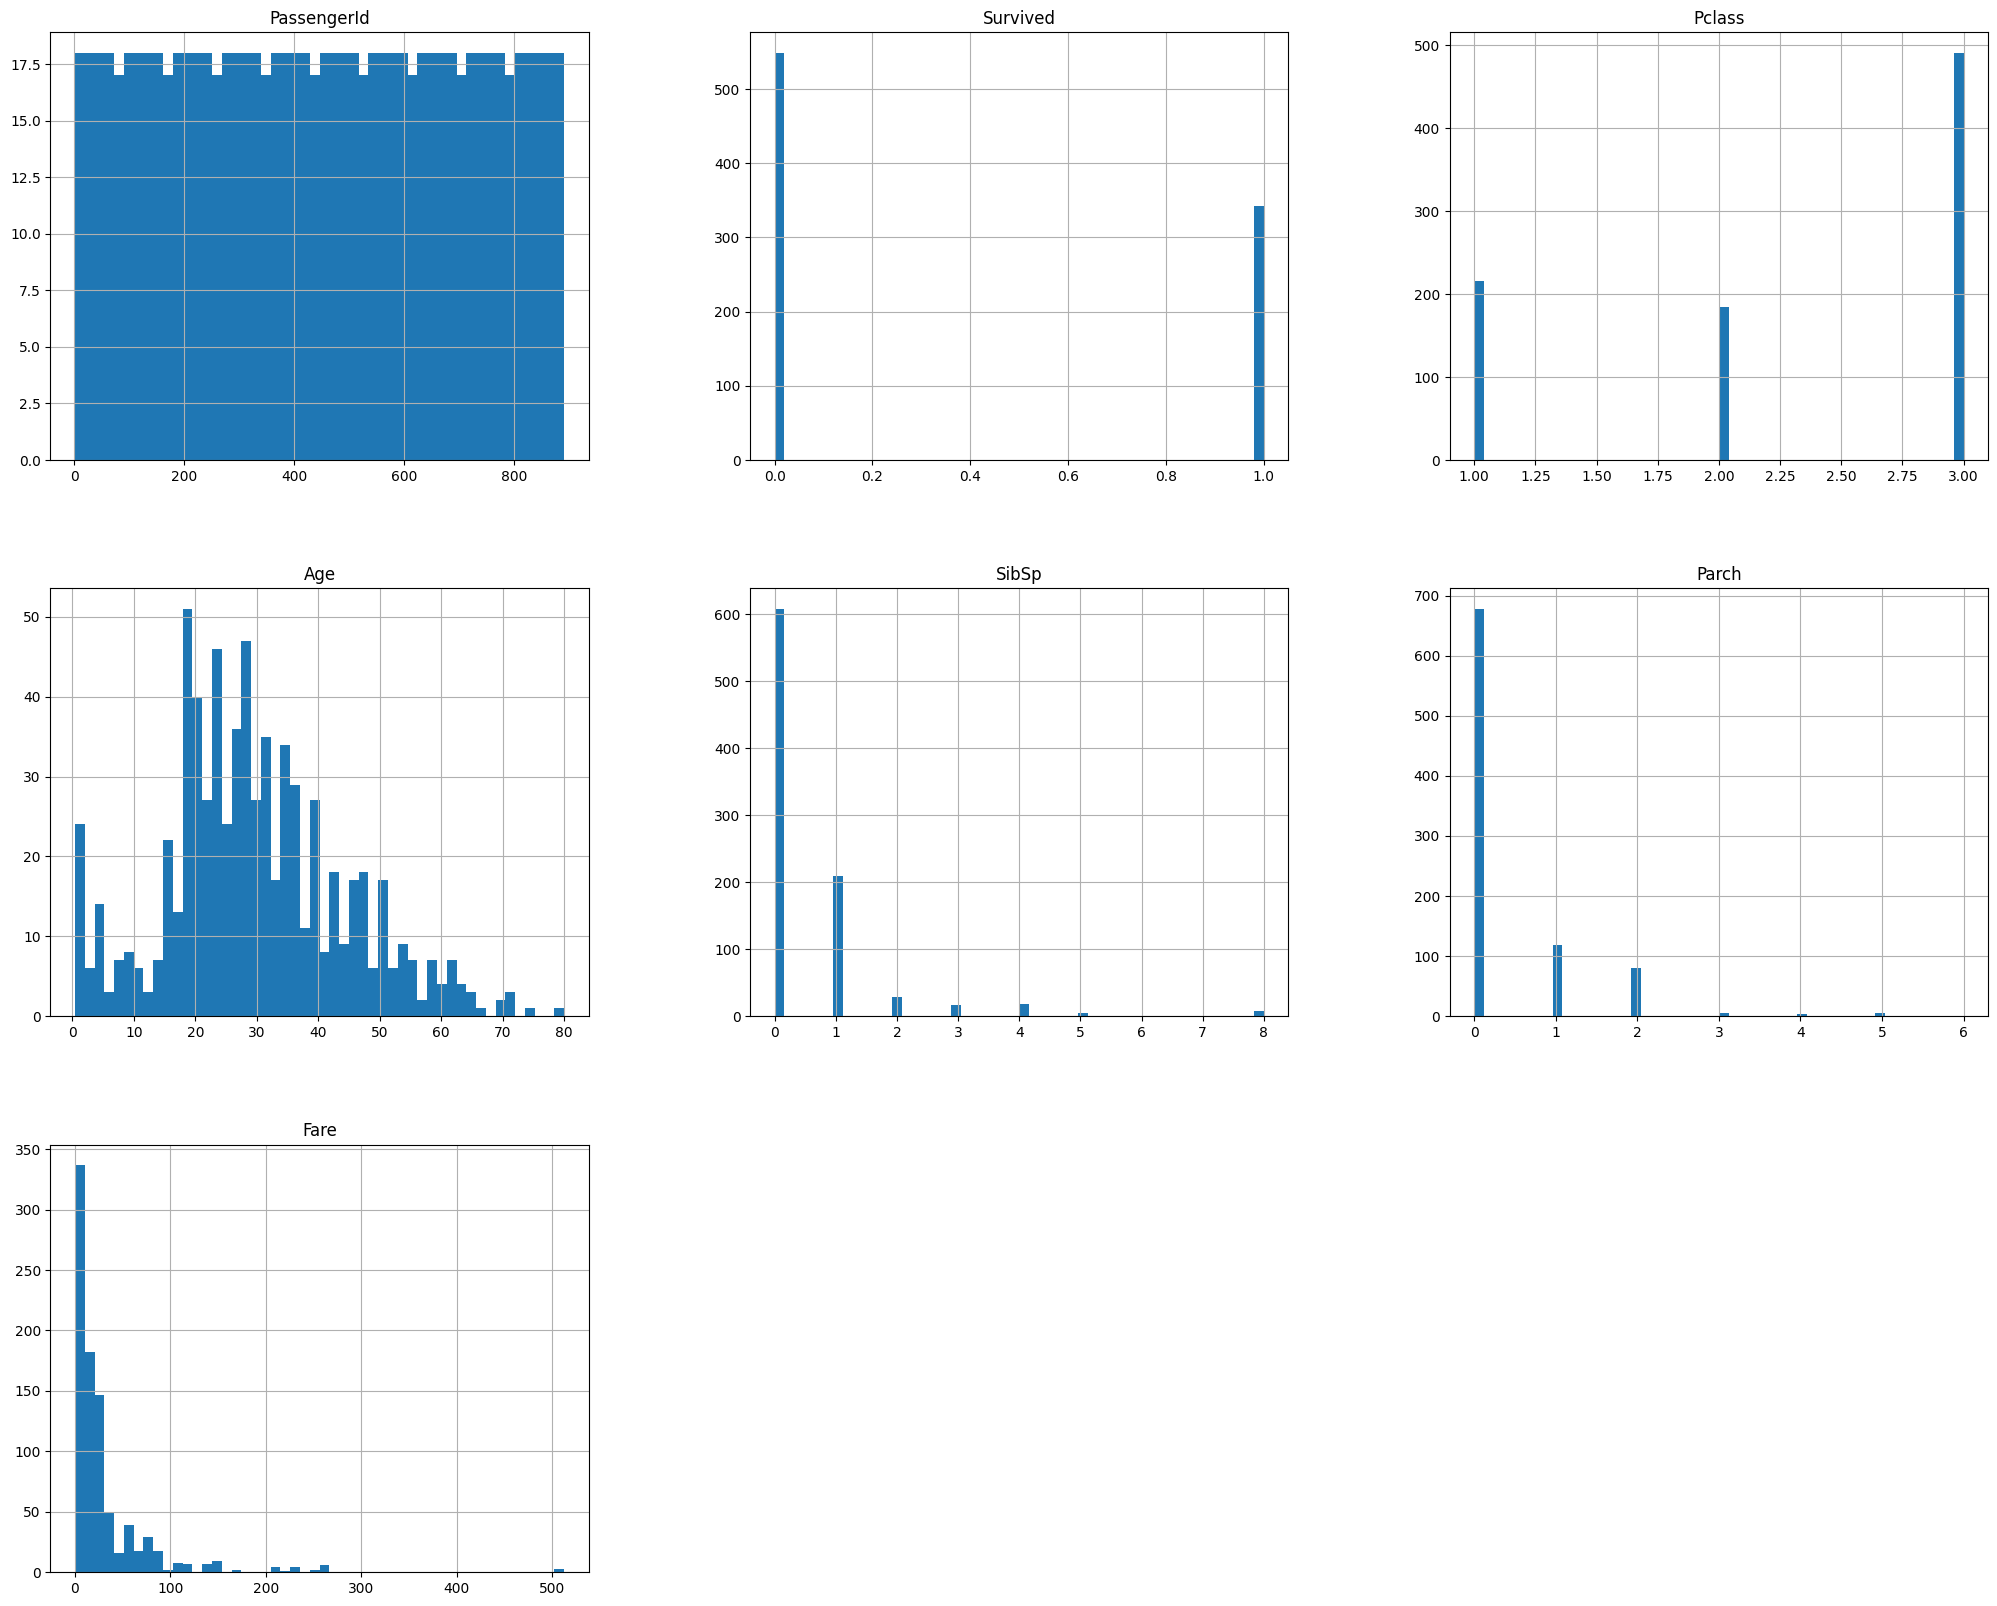

In [26]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

## Removing duplicated data points

In [27]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(891, 12)

## Creating a test set

In [28]:
original_train_df, test_df = train_test_split(df, test_size=0.2)

# To be sure we will create a copy for further processing
train_df = original_train_df.copy()

In [29]:
train_df.shape

(712, 12)

In [30]:
test_df.shape

(179, 12)

## Gaining further insight


In [31]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
...,...,...,...,...,...,...,...,...,...,...,...,...
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C


In [32]:
x = train_df[['Survived','Age', 'SibSp','Parch','Fare']].corr(method='pearson')
x

,Survived,Age,SibSp,Parch,Fare
Survived,1.000000,-0.096747,-0.045948,0.080937,0.242503
Age,-0.096747,1.000000,-0.342091,-0.185193,0.101776
SibSp,-0.045948,-0.342091,1.000000,0.434615,0.162541
Parch,0.080937,-0.185193,0.434615,1.000000,0.228693
Fare,0.242503,0.101776,0.162541,0.228693,1.000000


In [33]:
x["Fare"].sort_values()

Age         0.101776
SibSp       0.162541
Parch       0.228693
Survived    0.242503
Fare        1.000000
Name: Fare, dtype: float64

## Handling missing data

In [34]:
names = ['PassengerId', 'Survived','Age', 'SibSp','Parch','Fare']

for name in names:
    train_df[name].replace(0, np.nan, inplace=True)
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
169,170,NaN,3,"Ling, Mr. Lee",male,28.0,NaN,NaN,1601,56.4958,NaN,S
318,319,1.0,1,"Wick, Miss. Mary Natalie",female,31.0,NaN,2.0,36928,164.8667,C7,S
201,202,NaN,3,"Sage, Mr. Frederick",male,NaN,8.0,2.0,CA. 2343,69.5500,NaN,S
371,372,NaN,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1.0,NaN,3101267,6.4958,NaN,S
839,840,1.0,1,"Marechal, Mr. Pierre",male,NaN,NaN,NaN,11774,29.7000,C47,C
350,351,NaN,3,"Odahl, Mr. Nils Martin",male,23.0,NaN,NaN,7267,9.2250,NaN,S
837,838,NaN,3,"Sirota, Mr. Maurice",male,NaN,NaN,NaN,392092,8.0500,NaN,S
596,597,1.0,2,"Leitch, Miss. Jessie Wills",female,NaN,NaN,NaN,248727,33.0000,NaN,S


In [35]:
train_df.apply(lambda a: a.sort_values().values)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
169,1,1.0,1,"Abbing, Mr. Anthony",female,0.42,1.0,1.0,110152,4.0125,A10,C
318,5,1.0,1,"Abbott, Mr. Rossmore Edward",female,0.67,1.0,1.0,110152,6.2375,A14,C
201,6,1.0,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,0.75,1.0,1.0,110152,6.4375,A19,C
371,7,1.0,1,"Abelson, Mr. Samuel",female,0.83,1.0,1.0,110413,6.4500,A20,C
839,8,1.0,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,1.00,1.0,1.0,110413,6.4958,A23,C
...,...,...,...,...,...,...,...,...,...,...,...,...
772,883,NaN,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",male,NaN,NaN,NaN,W./C. 6608,NaN,NaN,S
293,885,NaN,3,"de Mulder, Mr. Theodore",male,NaN,NaN,NaN,W./C. 6609,NaN,NaN,S
299,888,NaN,3,"de Pelsmaeker, Mr. Alfons",male,NaN,NaN,NaN,W/C 14208,NaN,NaN,S
26,890,NaN,3,"van Billiard, Mr. Austin Blyler",male,NaN,NaN,NaN,WE/P 5735,NaN,NaN,S


In [36]:
survived_median = train_df["Survived"].median()
age_median = train_df["Age"].median()
sibsp_median = train_df["SibSp"].median()
parch_median = train_df["Parch"].median()

train_df["Survived"].fillna(survived_median, inplace=True)
train_df["Age"].fillna(age_median, inplace=True)
train_df["SibSp"].fillna(sibsp_median, inplace=True)
train_df["Parch"].fillna(parch_median, inplace=True)

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
169,170,1.0,3,"Ling, Mr. Lee",male,28.0,1.0,1.0,1601,56.4958,NaN,S
318,319,1.0,1,"Wick, Miss. Mary Natalie",female,31.0,1.0,2.0,36928,164.8667,C7,S
201,202,1.0,3,"Sage, Mr. Frederick",male,28.0,8.0,2.0,CA. 2343,69.5500,NaN,S
371,372,1.0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1.0,1.0,3101267,6.4958,NaN,S
839,840,1.0,1,"Marechal, Mr. Pierre",male,28.0,1.0,1.0,11774,29.7000,C47,C


## Rescaling or standardizing attributes

In [38]:
column_names = train_df.filter(['Survived','Age', 'SibSp','Parch','Fare'], axis=1)
column_names

,Survived,Age,SibSp,Parch,Fare
169,1.0,28.0,1.0,1.0,56.4958
318,1.0,31.0,1.0,2.0,164.8667
201,1.0,28.0,8.0,2.0,69.5500
371,1.0,18.0,1.0,1.0,6.4958
839,1.0,28.0,1.0,1.0,29.7000
...,...,...,...,...,...
772,1.0,57.0,1.0,1.0,10.5000
293,1.0,24.0,1.0,1.0,8.8500
299,1.0,50.0,1.0,1.0,247.5208
26,1.0,28.0,1.0,1.0,7.2250


In [39]:
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

temp1_df = train_df.copy()
column_names = train_df.filter(['Survived','Age', 'SibSp','Parch','Fare'], axis=1)
column_names

temp1_df.sort_index(inplace=True)
temp1_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,1.0,A/5 21171,7.2500,NaN,S
4,5,1.0,3,"Allen, Mr. William Henry",male,35.0,1.0,1.0,373450,8.0500,NaN,S
5,6,1.0,3,"Moran, Mr. James",male,28.0,1.0,1.0,330877,8.4583,NaN,Q
6,7,1.0,1,"McCarthy, Mr. Timothy J",male,54.0,1.0,1.0,17463,51.8625,E46,S
7,8,1.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,1.0,2.0,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,1.0,237736,30.0708,NaN,C
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1.0,1.0,PP 9549,16.7000,G6,S


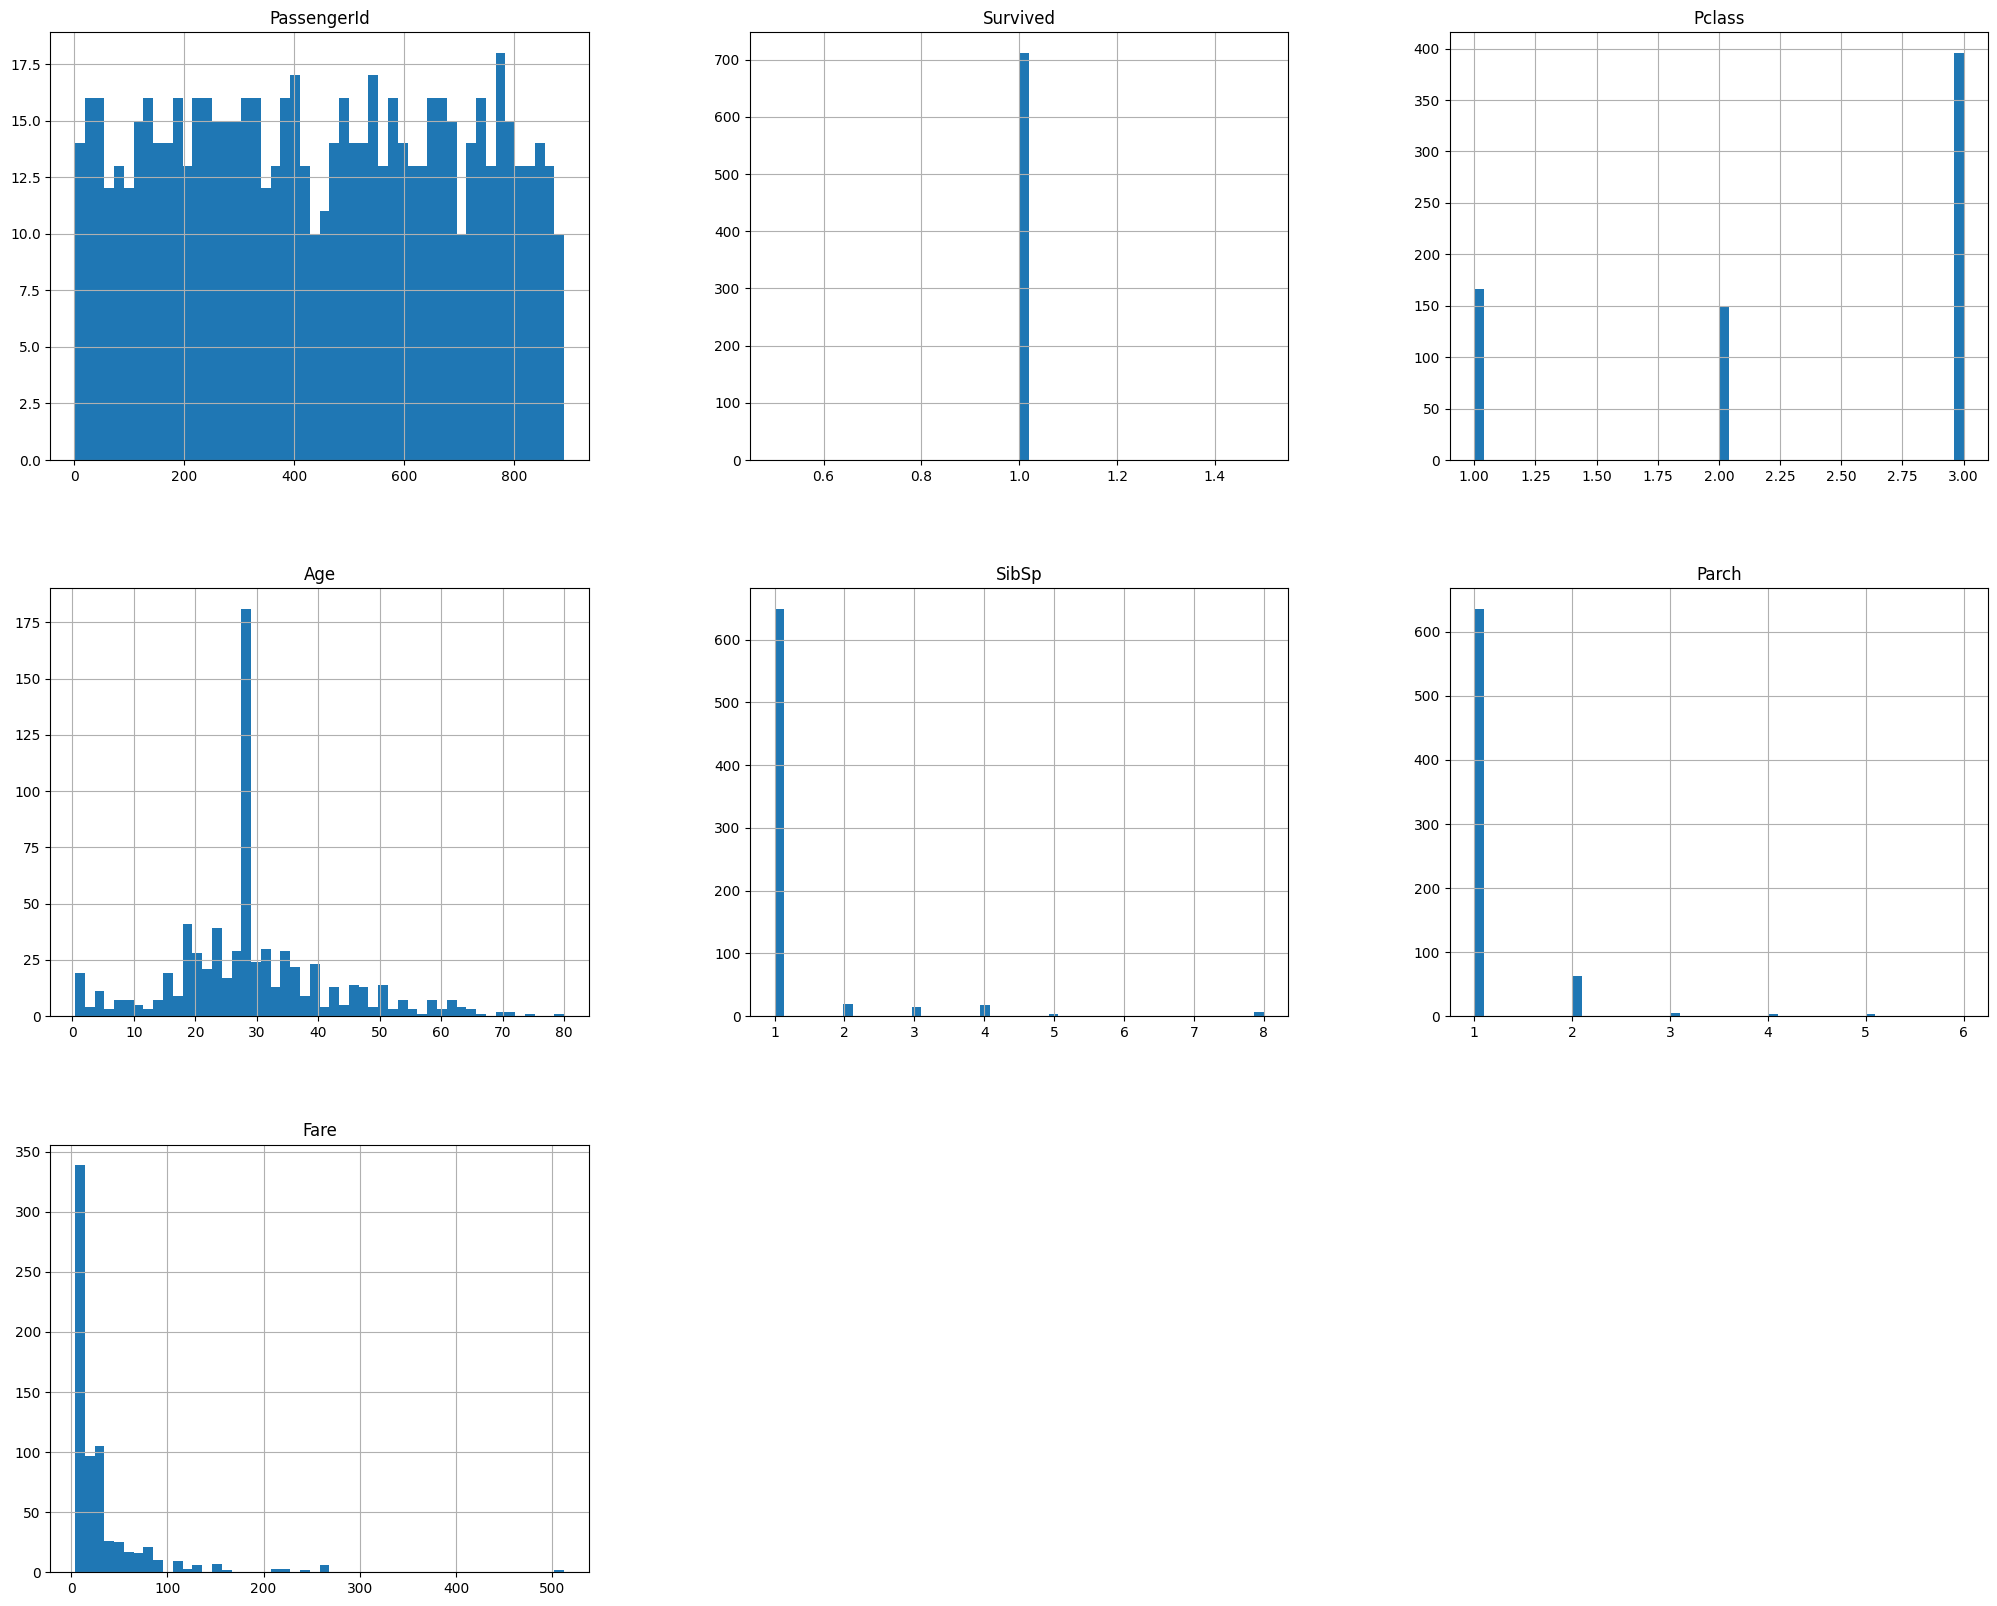

In [40]:
temp1_df.hist(bins=50, figsize=(25, 20))
plt.show()